In [15]:
import numpy as np
from matplotlib.pyplot import *
import prjlib
import basic
import analysis as ana

In [16]:
#PSA = 's14&15_boss'
PSA = 's14&15_deep56'
rlmin = '200'
ps, fs = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='lcmb',doreal='True')
pr, fr = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='lcmb',doreal='True',dearot='True')
pa, fa = prjlib.filename_init(PSA=PSA,rlmin=rlmin,stype='absrot')

In [17]:
snmax = 100
Lmin, Lmax = 10, 2048
L = np.linspace(0,Lmax,Lmax+1)
scl = np.array([np.loadtxt(ps.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,snmax+1)])
ocl = np.loadtxt(ps.quad.f['EB'].ocls,unpack=True)[1]
rcl = np.loadtxt(pr.quad.f['EB'].ocls,unpack=True)[1]
acl = np.array([np.loadtxt(pa.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,snmax+1)])
dcl = np.mean(acl-scl,axis=0)
fcl = 1e-4*2*np.pi/(L**2+L+1e-30)
l, cs, vs = np.loadtxt(ps.quad.f['EB'].mcls,usecols=(0,1,5),unpack=True)

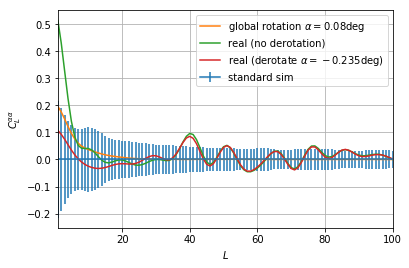

In [23]:
s = 1e6
grid(True)
xlim(1,100)
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}$')
errorbar(l,cs-cs,yerr=s*vs,fmt='-',label='standard sim')
#plot(l,ca-cs,label=r'global rotation $\alpha=0.08$deg')
plot(l,s*dcl,label=r'global rotation $\alpha=0.08$deg')
#plot(L[Lmin:],fcl[Lmin:]*1e-1)
plot(l,s*ocl,label=r'real (no derotation)')
plot(l,s*rcl,label=r'real (derotate $\alpha=-0.235$deg)')
legend(loc=0)
savefig('fig_absrot.png')

In [5]:
bn = 30
b0, b1, spc = 0, bn, 'p2'
scb = prjlib.binning(scl,bn,spc,lmin=Lmin)[:,b0:b1]
acb = prjlib.binning(acl,bn,spc,lmin=Lmin)[:,b0:b1]
fcb = basic.aps.cl2bcl(bn,Lmax,fcl,spc=spc,lmin=Lmin)[b0:b1]
ocl = np.loadtxt(ps.quad.f['EB'].ocls,unpack=True)[1,:]
ocb = basic.aps.cl2bcl(bn,Lmax,ocl,spc=spc,lmin=Lmin)[b0:b1]

TypeError: binning() got an unexpected keyword argument 'lmin'

In [ ]:
st = ana.statistics(ocl=ocb,scl=scb)
ana.statistics.get_amp(st,fcl=fcb)
print('mean A', st.mA, 'sigma(A)', st.sA, 'S/N', 1./st.sA, 'A>oA', st.p)
oA = np.zeros(100)
for i in range(100):
    at = ana.statistics(ocl=acb[i,:],scl=scb)
    ana.statistics.get_amp(at,fcl=fcb)
    oA[i] = at.oA
print(np.mean(oA),np.mean(st.A))